In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import membership as mf

print("lib imported")

lib imported


In [2]:
#input variables (antecedents)
performance = ctrl.Antecedent(np.arange(0, 4.1, 0.1), "performance") #cgpa, (0.00 - 4.00)
attendance = ctrl.Antecedent(np.arange(0, 101, 1), "attendance") #attendance (0% - 100%)
lms_time = ctrl.Antecedent(np.arange(0, 41, 1), "lms_time") #time spent on learning management system (0.0 - 20.5 - 40.0)[hours/week]
family_income = ctrl.Antecedent(np.arange(0, 20001, 100), "family_income") #household income/month (0-20,000RM)
scholarship = ctrl.Antecedent(np.arange(0, 101, 1), 'scholarship') #10%, 20% half, full 

#output variables (consequents)
risk = ctrl.Consequent(np.arange(0, 101, 1), 'dropout_risk') #% risk from 0-100

print("in out vars defined")

in out vars defined


In [3]:
#linguistic variables
#GPA 
performance['VeryPoor'] = fuzz.trapmf(performance.universe, [0.0, 0.0, 1.0, 1.5])
performance['Poor'] = fuzz.trimf(performance.universe, [1.0, 1.75, 2.5])
performance['Average'] = fuzz.trimf(performance.universe, [2.0, 2.75, 3.5])
performance['Good'] = fuzz.trapmf(performance.universe, [3.0, 3.5, 4.0, 4.0])

#attendance 
attendance['VeryLow'] = fuzz.trapmf(attendance.universe, [0, 0, 40, 60])
attendance['Low'] = fuzz.trimf(attendance.universe, [50, 65, 80])
attendance['Medium'] = fuzz.trimf(attendance.universe, [70, 85, 95])
attendance['High'] = fuzz.trapmf(attendance.universe, [90, 95, 100, 100])

#LMS  (hours/week)
lms_time['Low'] = fuzz.trapmf(lms_time.universe, [0, 0, 2, 5])
lms_time['Medium'] = fuzz.trimf(lms_time.universe, [3, 8, 12])
lms_time['High'] = fuzz.trapmf(lms_time.universe, [10, 15, 40, 40])
 
#household income 
family_income['B40'] = fuzz.trapmf(family_income.universe, [0, 0, 3000, 5000])
family_income['M40'] = fuzz.trimf(family_income.universe, [4000, 7500, 11000])
family_income['T20'] = fuzz.trapmf(family_income.universe, [10000, 15000, 20000, 20000])

#scholarship 
scholarship['None'] = fuzz.trapmf(scholarship.universe, [0, 0, 10, 25])
scholarship['Partial'] = fuzz.trimf(scholarship.universe, [20, 50, 75])
scholarship['Full'] = fuzz.trapmf(scholarship.universe, [70, 90, 100, 100])

#dropout risk
risk['Low'] = fuzz.trapmf(risk.universe, [0, 0, 15, 30])
risk['Medium'] = fuzz.trimf(risk.universe, [20, 40, 60])
risk['High'] = fuzz.trimf(risk.universe, [50, 70, 90])
risk['VeryHigh'] = fuzz.trapmf(risk.universe, [80, 95, 100, 100])

print("linguistic var defined")

linguistic var defined


In [4]:
#just testing ignore 

# performance.view()
# attendance.view()
# lms_time.view()
# family_income.view()
# scholarship.view()
# risk.view()

In [34]:
#fuzzy rules
#high risk rules 
rule1 = ctrl.Rule(performance['VeryPoor'] & attendance['VeryLow'], risk['VeryHigh'])
rule2 = ctrl.Rule(performance['Poor'] & attendance['VeryLow'], risk['VeryHigh'])
rule3 = ctrl.Rule(performance['Poor'] & attendance['Low'], risk['High'])
rule4 = ctrl.Rule(lms_time['Low'] & performance['Poor'], risk['High'])
rule5 = ctrl.Rule(family_income['B40'] & scholarship['None'], risk['High']) 
    
#low risk rules
rule6 = ctrl.Rule(performance['Good'] & attendance['High'] & lms_time['High'], risk['Low'])
rule7 = ctrl.Rule(family_income['T20'], risk['Low']) 
rule8 = ctrl.Rule(scholarship['Full'], risk['Low']) 
rule9 = ctrl.Rule(performance['Average'] & attendance['High'] & scholarship['Partial'], risk['Low'])

#medium risk / mixed rules
rule10 = ctrl.Rule(performance['Poor'] & attendance['High'] & lms_time['High'], risk['Medium']) 
rule11 = ctrl.Rule(performance['Good'] & attendance['Low'], risk['Medium']) 
rule12 = ctrl.Rule(performance['Average'] & attendance['Medium'] & lms_time['Medium'], risk['Medium'])
rule13 = ctrl.Rule(family_income['B40'] & scholarship['Full'], risk['Medium'])
rule14 = ctrl.Rule(performance['Average'] & family_income['M40'] & scholarship['None'], risk['Medium'])
rule15 = ctrl.Rule(performance['Average'] & family_income['M40'] & scholarship['Partial'], risk['Medium'])

rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15]

print("rules created")

rules created


In [35]:
#inference and defuzzification (mamdani inference, centroid defuzz)
risk_ctrl = ctrl.ControlSystem(rules = rules)
risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)

print("sim created")

sim created



--- Case Study: Test Student ---
GPA: 4 | attendance: 65 | LMS Time: 10 | income: 10000 | scholarship: 25
dropout risk: 40.00%
suggestion: May require academic monitoring


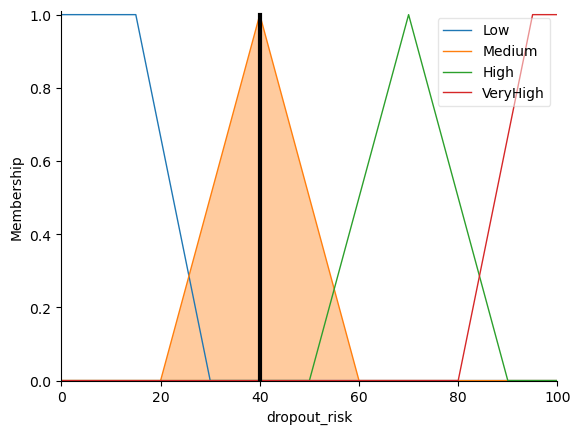

In [40]:
#testing 

performance_input = 4 #when you wanna test just modify numbers here
attendance_input = 65
lms_time_input = 10
family_income_input = 10000
scholarship_input = 25

LR_int = "Student is stable; no intervention needed"
MR_int = "May require academic monitoring"
HR_int = "Early intervention recommended"
VHR_int = "Immediate counselling necessary"

def interpretation(risk_score):
    intp = ''
    if 0 <= risk_score <= 30:
        intp = LR_int
    elif 30 < risk_score <= 60:
        intp = MR_int
    elif 60 < risk_score <= 80:
        intp = HR_int
    else: 
        intp = VHR_int
        
    return intp

risk_sim.input['performance'] = performance_input
risk_sim.input['attendance'] = attendance_input
risk_sim.input['lms_time'] = lms_time_input
risk_sim.input['family_income'] = family_income_input
risk_sim.input['scholarship'] = scholarship_input

#compute
try: 
    risk_sim.compute()
    
    dropoutRisk = risk_sim.output['dropout_risk']
    
    #print crisp output
    print(f"\n--- Case Study: Test Student ---")
    print(f"GPA: {performance_input} | attendance: {attendance_input} | LMS Time: {lms_time_input} | income: {family_income_input} | scholarship: {scholarship_input}")
    print(f"dropout risk: {risk_sim.output['dropout_risk']:.2f}%")
    print(f"suggestion: {interpretation(dropoutRisk)}")

    #view defuzzification results
    risk.view(sim=risk_sim)
    
except KeyError:
    # This happens if no rules are fired for the given inputs
    print(f"\n--- Case Study: Test Student ---")
    print(f"Inputs: Performance: {performance_input} | Attendance: {attendance_input}% | LMS Time: {lms_input} | Income: {income_input} | Scholarship: {scholarship_input}%")
    print("\n*** ERROR: No rules were fired for this input combination. ***")
    print("The system could not determine a risk. Assigning a default medium risk of 50.")
    dropoutRisk = 50.0 # Assign a safe, default "medium" risk
    print(f"Calculated Dropout Risk: {dropoutRisk:.2f}%")
    print(f"Suggestion: {interpretation(dropoutRisk)}")

